Importing required libraries for the analysis

In [3]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
loan_data = pd.read_csv('C:/Users/SONY/Downloads/loan.csv', low_memory=False)

In [5]:
loan_data.shape

(39717, 111)

In [6]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
loan_data = loan_data[loan_data.loan_status != 'Current']
loan_data.shape

(38577, 111)

---------------------------------------------------------------------------------

Current loan status are the one's currently paying for the loan - hence we will ignore the loan data which is having loan 
status as current and other loan status such as Charged Off and Fully Paid will be considered

---------------------------------------------------------------------------------

In [8]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

---------------------------------------------------------------------------------

We need to get rid of columns with null values

---------------------------------------------------------------------------------

In [9]:
loan_data.dropna(axis = 1 , how = 'all' , thresh = None , inplace = True )
loan_data.shape

(38577, 56)

In [10]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


---------------------------------------------------------------------------------

Out of 56 columns there are only few columns which can help in generating analysis based on which we
can decide if the customer is expected to pay loans on time or will abscond.
Hence we will select only those and ignore the rest of the columns from these 56 ones.

In [11]:
list(loan_data.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [12]:
loan_data=loan_data[["id","member_id","loan_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade",
           "emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","purpose","dti",
           "earliest_cr_line","inq_last_6mths","open_acc","pub_rec","total_acc"]]

In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   member_id            38577 non-null  int64  
 2   loan_amnt            38577 non-null  int64  
 3   funded_amnt_inv      38577 non-null  float64
 4   term                 38577 non-null  object 
 5   int_rate             38577 non-null  object 
 6   installment          38577 non-null  float64
 7   grade                38577 non-null  object 
 8   sub_grade            38577 non-null  object 
 9   emp_length           37544 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  pymnt_plan           38577 non-null 

In [14]:
round((loan_data.isnull().sum()/len(loan_data.index))*100,2)

id                     0.00
member_id              0.00
loan_amnt              0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.68
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
pymnt_plan             0.00
purpose                0.00
dti                    0.00
earliest_cr_line       0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
total_acc              0.00
dtype: float64

emp_length is having null values which needs to be corrected before we proceed further


In [15]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0] , inplace = True)

In [16]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   member_id            38577 non-null  int64  
 2   loan_amnt            38577 non-null  int64  
 3   funded_amnt_inv      38577 non-null  float64
 4   term                 38577 non-null  object 
 5   int_rate             38577 non-null  object 
 6   installment          38577 non-null  float64
 7   grade                38577 non-null  object 
 8   sub_grade            38577 non-null  object 
 9   emp_length           38577 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  pymnt_plan           38577 non-null 

---------------------------------------------------------------------------------

Now since we have fixed the issue with null/missing values for emp_length column.
Now we need to have converted emp_length column to int and get rid of extra values in the field such as '<','+ years'
Also column name intrest rate also has % sign which need to be removed
and convert both columns to int type

---------------------------------------------------------------------------------

In [17]:
loan_data['emp_length'] = loan_data['emp_length'].str.extract('(\d+)').astype(int)

In [18]:
loan_data['emp_length'].unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [19]:
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%')

In [20]:
loan_data['int_rate'].unique()


array(['10.65', '15.27', '15.96', '13.49', '7.90', '18.64', '21.28',
       '12.69', '14.65', '9.91', '16.29', '6.03', '11.71', '12.42',
       '14.27', '16.77', '7.51', '8.90', '18.25', '6.62', '19.91',
       '17.27', '17.58', '21.67', '19.42', '20.89', '20.30', '23.91',
       '19.03', '23.13', '22.74', '22.35', '22.06', '24.11', '6.00',
       '23.52', '22.11', '7.49', '11.99', '5.99', '10.99', '9.99',
       '18.79', '11.49', '8.49', '15.99', '16.49', '6.99', '12.99',
       '15.23', '14.79', '5.42', '10.59', '17.49', '15.62', '19.29',
       '13.99', '18.39', '16.89', '17.99', '20.99', '22.85', '19.69',
       '20.62', '20.25', '21.36', '23.22', '21.74', '22.48', '23.59',
       '12.62', '18.07', '11.63', '7.91', '7.42', '11.14', '20.20',
       '12.12', '19.39', '16.11', '17.54', '22.64', '13.84', '16.59',
       '17.19', '12.87', '20.69', '9.67', '21.82', '19.79', '18.49',
       '22.94', '24.40', '21.48', '14.82', '14.17', '7.29', '17.88',
       '20.11', '16.02', '13.43', '14

In [21]:
loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

Checking for Outlier in Annual Income field

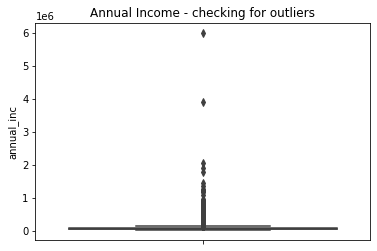

In [22]:
sns.boxplot(y=loan_data['annual_inc'] )
plt.ylabel('annual_inc')
plt.title('Annual Income - checking for outliers')
plt.show()



There are outliers present in the data which need to be checked and removed using quantile .

In [23]:
quantile_annual_inc = loan_data['annual_inc'].quantile([0.5,0.7,0.90,0.95,0.98])
quantile_annual_inc_correction = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= quantile_annual_inc_correction]

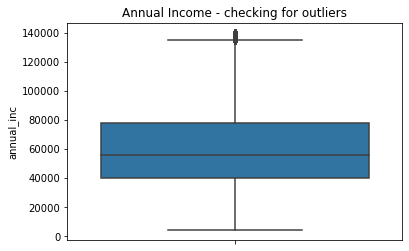

In [24]:
sns.boxplot(y=loan_data['annual_inc'] )
plt.ylabel('annual_inc')
plt.title('Annual Income - checking for outliers')
plt.show()



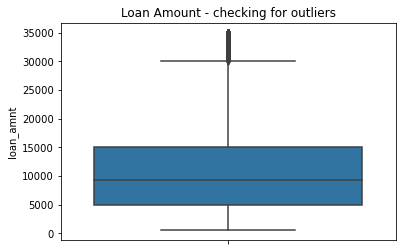

In [25]:
sns.boxplot(y=loan_data['loan_amnt'] )
plt.ylabel('loan_amnt')
plt.title('Loan Amount - checking for outliers')
plt.show()



Inference - loan amount stand between 0 and 35K and the mean is 20K 
Checking for quantile details

In [26]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.98,0.99,1.0])


0.75    15000.0
0.90    20000.0
0.95    25000.0
0.97    25475.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

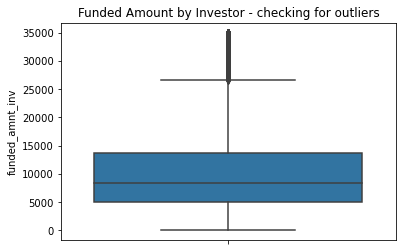

In [27]:
sns.boxplot(y=loan_data['funded_amnt_inv'] )
plt.ylabel('funded_amnt_inv')
plt.title('Funded Amount by Investor - checking for outliers')
plt.show()



In [28]:
loan_data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.98,0.99])

0.50     8375.000000
0.75    13623.731415
0.90    19750.000000
0.95    23941.875589
0.97    24975.000000
0.98    27950.000000
0.99    31954.028576
Name: funded_amnt_inv, dtype: float64

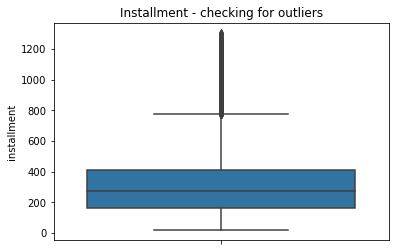

In [29]:
sns.boxplot(y=loan_data['installment'] )
plt.ylabel('installment')
plt.title('Installment - checking for outliers')
plt.show()



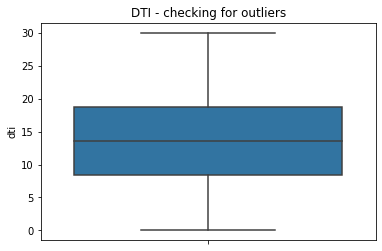

In [30]:
sns.boxplot(y=loan_data['dti'] )
plt.ylabel('dti')
plt.title('DTI - checking for outliers')
plt.show()



UNIVARIATE ANALYSIS

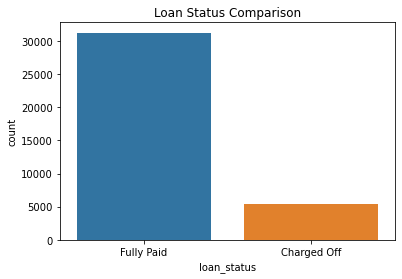

In [31]:
sns.countplot(x = 'loan_status', data = loan_data)

plt.title('Loan Status Comparison')
plt.show()

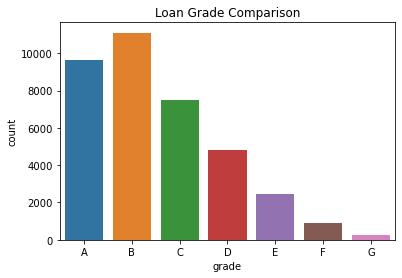

In [32]:
sns.countplot(x = 'grade', data = loan_data , order = ['A','B','C','D','E','F','G'])
plt.title('Loan Grade Comparison')
plt.show()

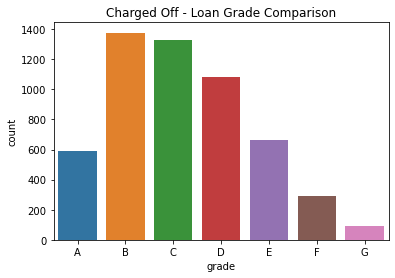

In [33]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status== 'Charged Off'] , order = ['A','B','C','D','E','F','G'])
plt.title('Charged Off - Loan Grade Comparison')
plt.show()

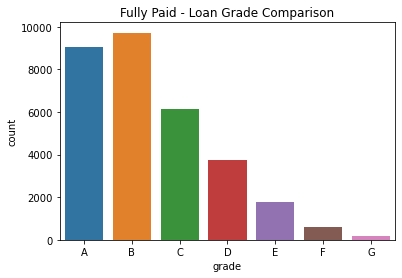

In [34]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status== 'Fully Paid'] , order = ['A','B','C','D','E','F','G'])
plt.title('Fully Paid - Loan Grade Comparison')
plt.show()

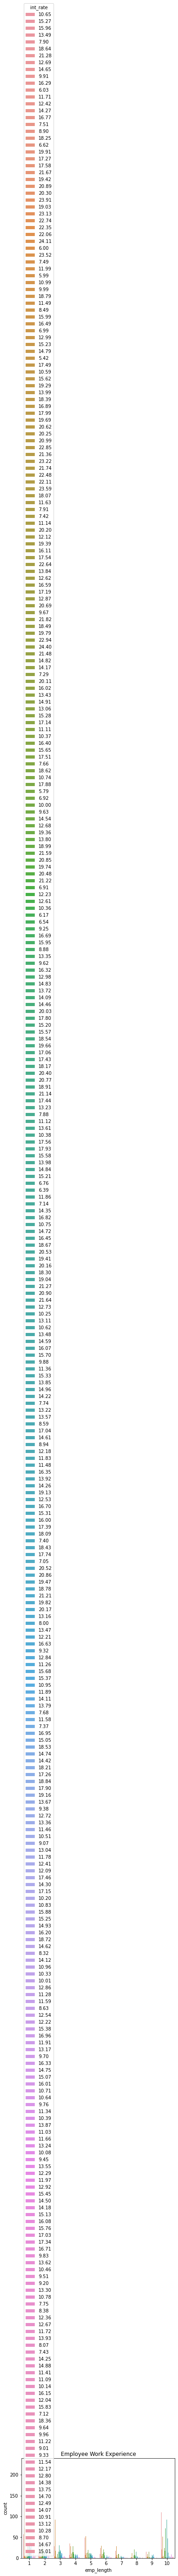

In [53]:
sns.countplot(x = 'emp_length', hue = 'int_rate', data = loan_data)
plt.title('Employee Work Experience')
plt.show()

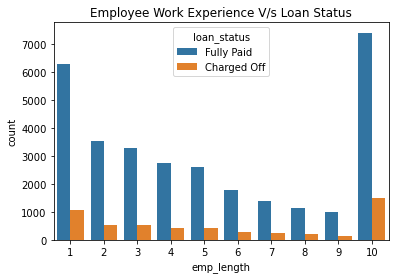

In [58]:
sns.countplot(x = 'emp_length', hue = 'loan_status',  data = loan_data)
plt.title('Employee Work Experience V/s Loan Status')
plt.show()

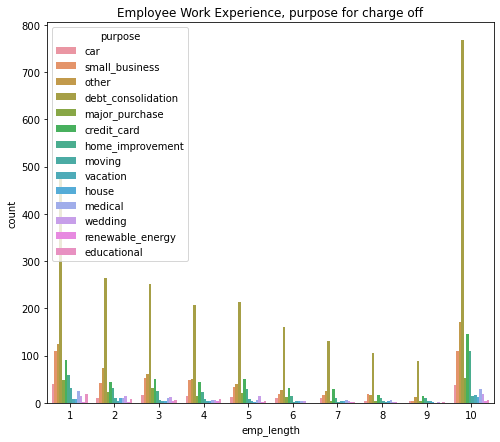

In [63]:
plt.figure(figsize=(8,7))
sns.countplot(x = 'emp_length', hue = 'purpose',  data = loan_data[loan_data.loan_status== 'Charged Off'])
plt.title('Employee Work Experience, purpose for charge off')
plt.show()

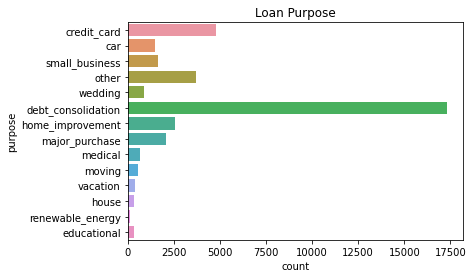

In [37]:
sns.countplot(y = 'purpose',  data = loan_data)
plt.title('Loan Purpose')
plt.show()

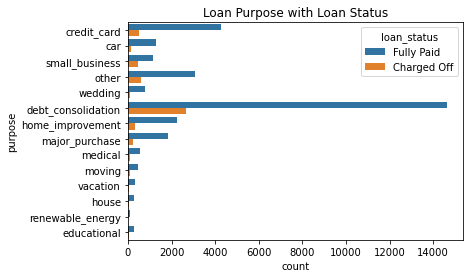

In [38]:
sns.countplot(y = 'purpose', hue = 'loan_status',  data = loan_data)
plt.title('Loan Purpose with Loan Status')
plt.show()

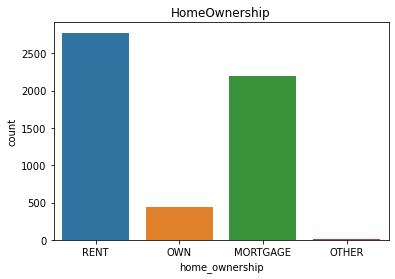

In [64]:
sns.countplot(x = 'home_ownership', data =  loan_data[loan_data.loan_status== 'Charged Off'])
plt.title('HomeOwnership')
plt.show()

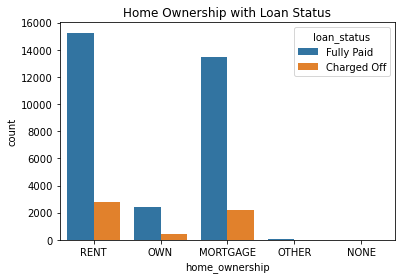

In [40]:
sns.countplot(x = 'home_ownership', hue='loan_status' , data = loan_data)
plt.title('Home Ownership with Loan Status')
plt.show()

Month and Year check

In [41]:
loan_data['loan_issue_month'] = loan_data['issue_d'].str.partition("-",True)[0]
loan_data['loan_issue_year'] = loan_data['issue_d'].str.partition("-",True)[2]

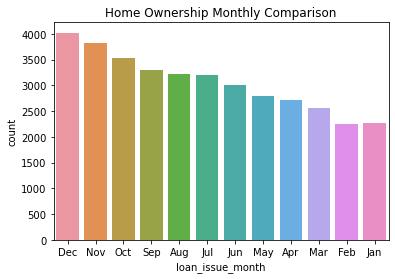

In [42]:
sns.countplot(x = 'loan_issue_month', data = loan_data)
plt.title('Home Ownership Monthly Comparison')
plt.show()

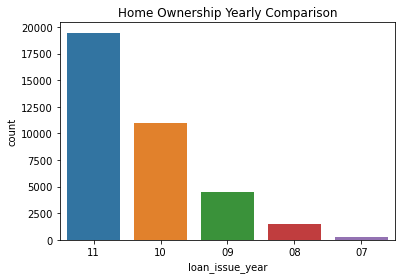

In [43]:
sns.countplot(x = 'loan_issue_year', data = loan_data)
plt.title('Home Ownership Yearly Comparison')
plt.show()

Now lets compare loan status based on month and year

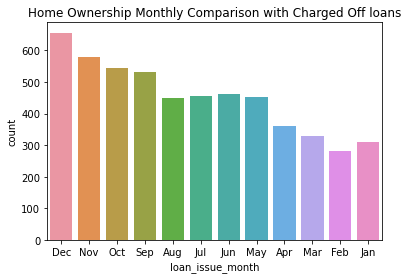

In [44]:
sns.countplot(x = 'loan_issue_month', data = loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.title('Home Ownership Monthly Comparison with Charged Off loans')
plt.show()

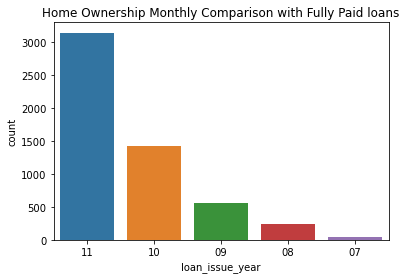

In [45]:
sns.countplot(x = 'loan_issue_year', data = loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.title('Home Ownership Monthly Comparison with Fully Paid loans')
plt.show()

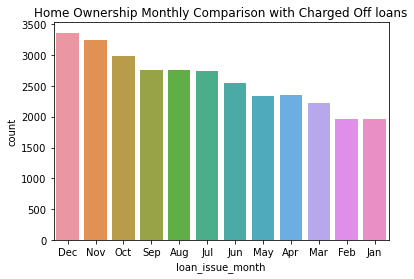

In [46]:
sns.countplot(x = 'loan_issue_month', data = loan_data[loan_data['loan_status'] == 'Fully Paid'])
plt.title('Home Ownership Monthly Comparison with Charged Off loans')
plt.show()

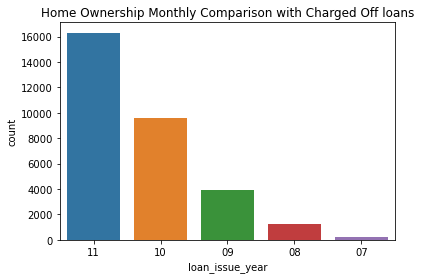

In [47]:
sns.countplot(x = 'loan_issue_year', data = loan_data[loan_data['loan_status'] == 'Fully Paid'])
plt.title('Home Ownership Monthly Comparison with Charged Off loans')
plt.show()

Above analysis shows that Dec 2011 had a mixed behaviour for both "Fully Paid" and "Charged Off"
In Dec 2011 there were maximum loans being - charged off and at the same time Dec 2011 there were maximum loans being - paid off

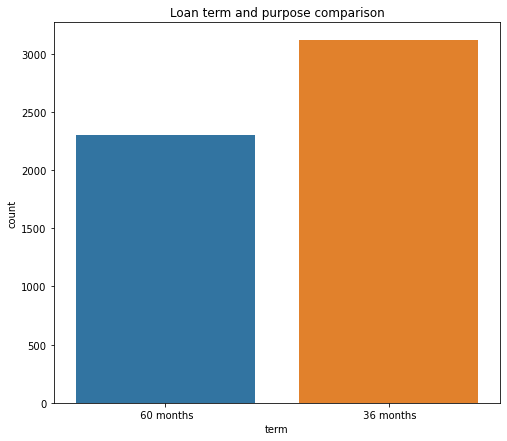

In [48]:
plt.figure(figsize=(8,7))
sns.countplot(x = 'term', data = loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.title('Loan term and purpose comparison')
plt.show()

Loan took for 36 months has more changes of falling under -"Charged off" or defaulter

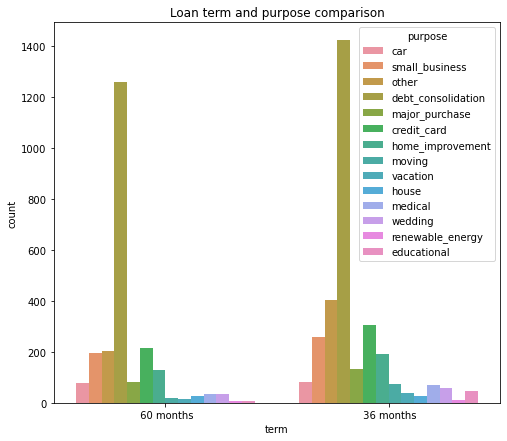

In [49]:
plt.figure(figsize=(8,7))
sns.countplot(x = 'term', hue ='purpose' , data = loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.title('Loan term and purpose comparison')
plt.show()

debt_consolidation - purpose of loan with 36 month of term have a very high chances of not paying the loan

Conclusion
Under below condition there is high likely chances that the person will fall under defaulter list and the loan will be charged off
- If the tenure of loan is 36 months - then the changes of defaulter is more.
- If the grade is 'B' then chances are more for being defaulter.
- Debt-consolidation purpose is the one where we have majority of defaulters.
-  Also is employee is 10+year experience and purpose of loan - "debt-consolidation" then chances are high for being defaulter
- Home_ownership with rent status has high change of defaulter
- Loan applied/sanctioned in month of december has high change of defaulter
- Every year the count of defaulter is increasing as a pattern and majority of them comes from debt-consolidation
- 
